In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

- **Carat**: Carat weight of the cubic zirconia
- **Cut**: Describe the cut quality of the cubic zirconia. Quality is in increasing order: Fair, Good, Very Good, Premium, Ideal.
- **Color**: Colour of the cubic zirconia, with D being the best and J the worst.
- **Clarity**: Cubic zirconia clarity refers to the absence of inclusions and blemishes. In order from best to worst: FL (flawless), IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- **Depth**: The height of a cubic zirconia, measured from the culet to the table, divided by its average girdle diameter.
- **Table**: The width of the cubic zirconia's table expressed as a percentage of its average diameter.
- **Price**: The price of the cubic zirconia.
- **X**: Length of the cubic zirconia in mm.
- **Y**: Width of the cubic zirconia in mm.
- **Z**: Height of the cubic zirconia in mm.

In [2]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df.shape

(26967, 10)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.nunique()

carat       257
cut           5
color         7
clarity       8
depth       169
table       112
x           531
y           526
z           356
price      8742
dtype: int64

In [35]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
volume     0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.drop_duplicates(inplace = True,keep='first')
df.dropna(inplace=True)

In [38]:
df.describe()

,carat,depth,table,x,y,z,price,volume
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818,129.850206
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223,80.228374
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000,64.777280
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000,114.605697
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000,171.210581
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000,3840.598060


<Axes: xlabel='carat', ylabel='price'>

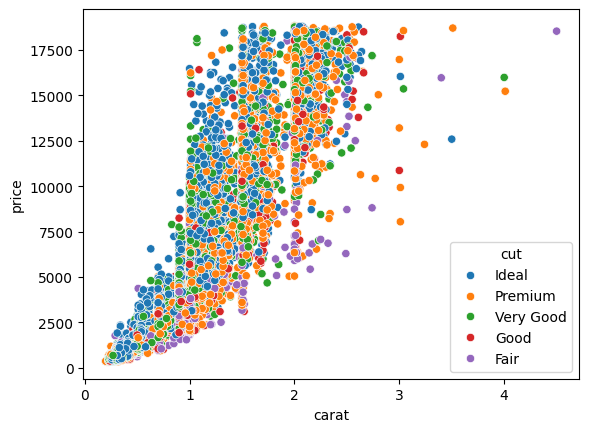

In [39]:
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'cut')


<Axes: xlabel='carat', ylabel='price'>

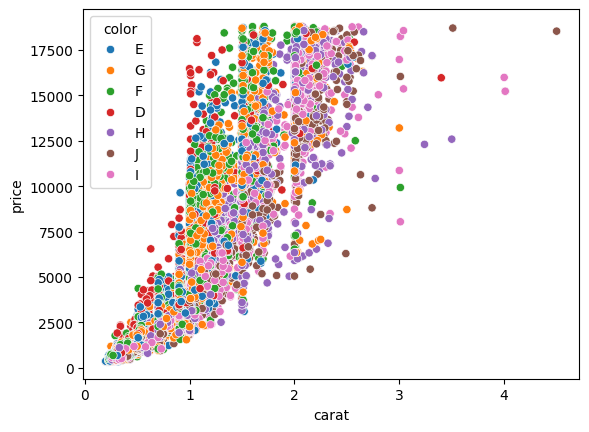

In [12]:
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'color')


Text(0, 0.5, 'Frequency')

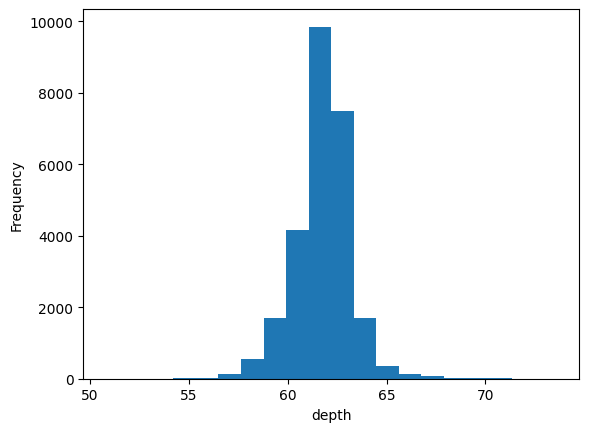

In [13]:
df['depth'].plot(kind = 'hist', bins = 20)
plt.xlabel('depth')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

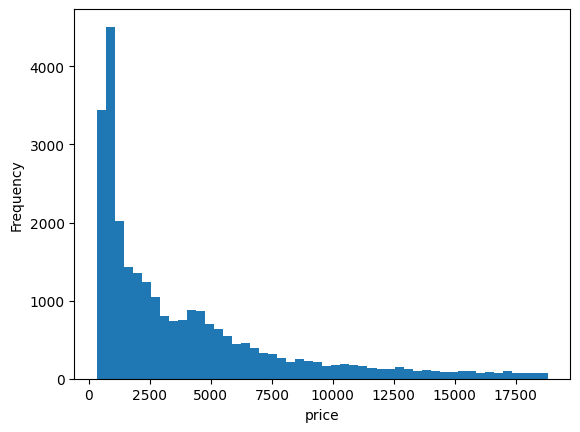

In [14]:
df['price'].plot(kind= 'hist', bins = 50)
plt.xlabel('price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

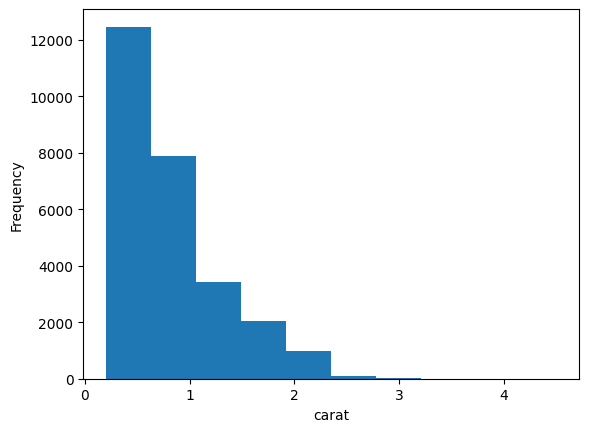

In [15]:
df['carat'].plot(kind = 'hist')
plt.xlabel('carat')
plt.ylabel('Frequency')

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<Axes: xlabel='cut', ylabel='count'>

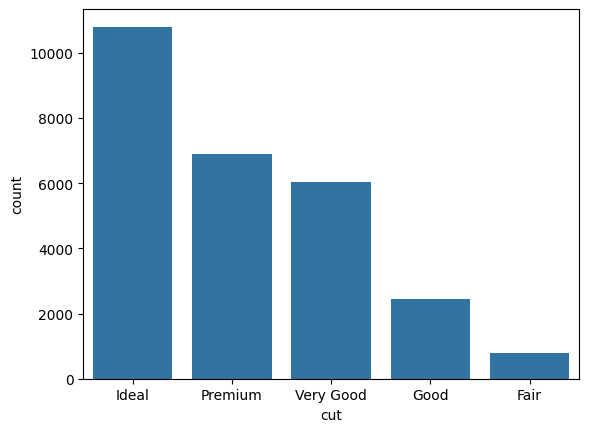

In [17]:
sns.countplot(data = df, x = 'cut')

<Axes: xlabel='color', ylabel='price'>

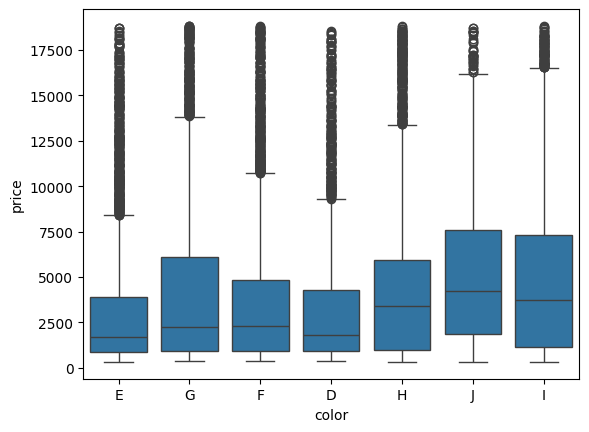

In [18]:
sns.boxplot(data = df, x = 'color', y = 'price')

<Axes: xlabel='cut', ylabel='price'>

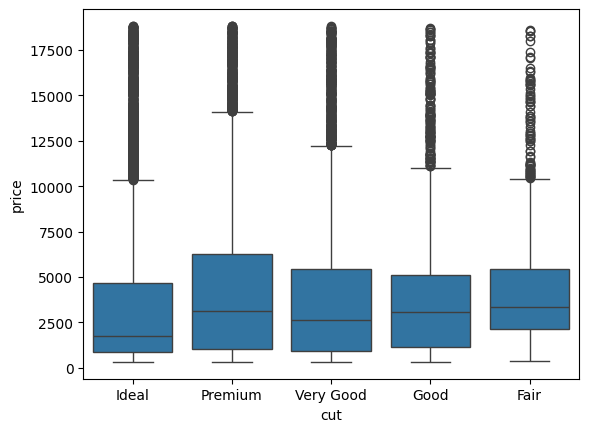

In [19]:
sns.boxplot(data = df, x = 'cut', y = 'price')

In [20]:
len(df[df['price'] > 10000])

2658

In [22]:
df["volume"] = df["x"] * df["y"] * df["z"]


<Axes: xlabel='volume', ylabel='price'>

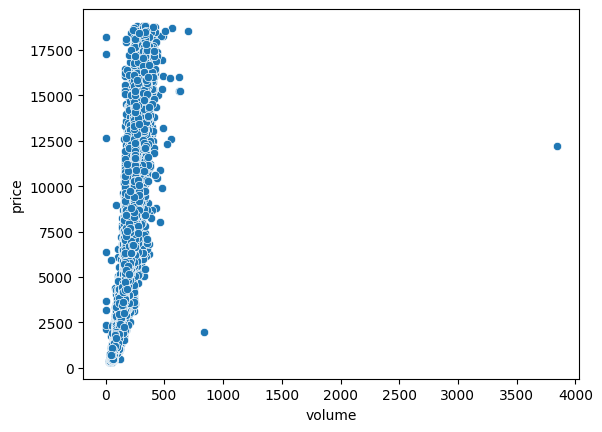

In [23]:
sns.scatterplot(data = df, x = 'volume', y = 'price')

<Axes: xlabel='surface_area', ylabel='price'>

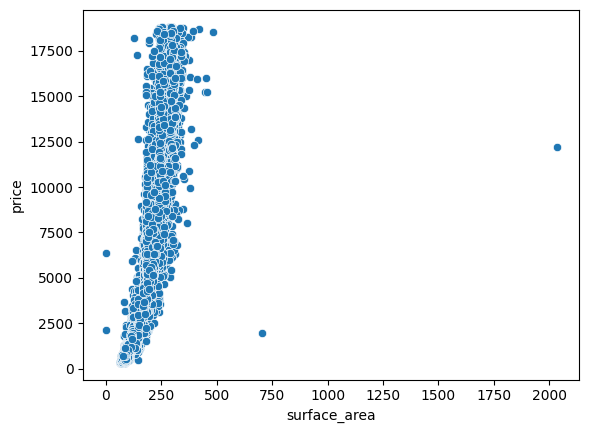

In [ ]:
sns.scatterplot(data = df, x = 'surface_area', y = 'price')

In [40]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,48.726678
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,53.225640
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,139.726944
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,68.482560
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,51.066825
...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408,176.267548
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114,53.771952
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656,83.586560
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682,45.754800


In [41]:
df.describe()

,carat,depth,table,x,y,z,price,volume
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818,129.850206
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223,80.228374
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000,64.777280
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000,114.605697
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000,171.210581
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000,3840.598060


In [42]:
df.describe(include = 'O')

,cut,color,clarity
count,26236,26236,26236
unique,5,7,8
top,Ideal,G,SI1
freq,10535,5521,6402


<Axes: xlabel='price', ylabel='cut'>

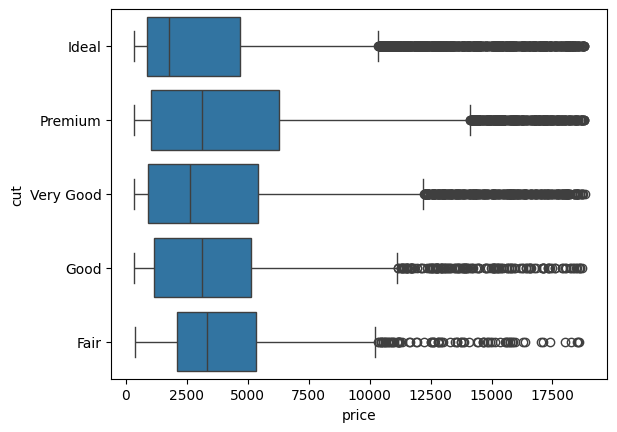

In [44]:
sns.boxplot(data = df, x = 'price', y = 'cut')

<Axes: ylabel='price'>

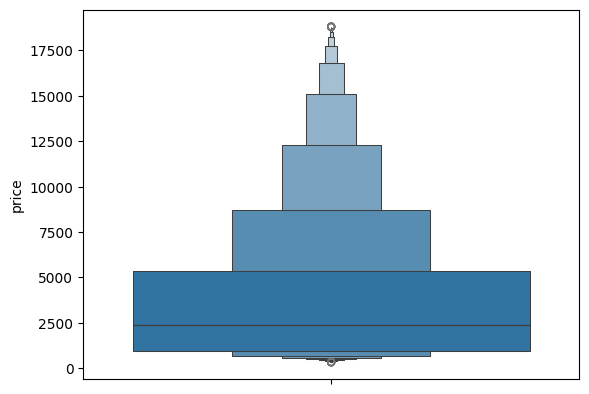

In [51]:
sns.boxenplot(data = df, y = 'price')

<Axes: ylabel='price'>

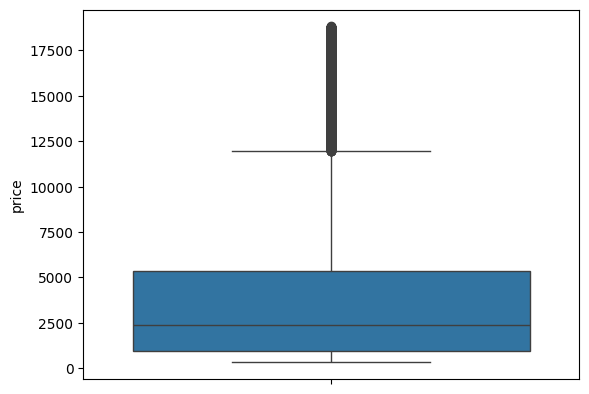

In [52]:
sns.boxplot(data = df, y = 'price')

In [57]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1

lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

filtered_df = df[~((df['price'] < lower_limit) | (df['price'] > upper_limit))]
filtered_df.shape

(24509, 11)

In [58]:
filtered_df

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,48.726678
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,53.225640
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,139.726944
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,68.482560
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,51.066825
...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408,176.267548
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114,53.771952
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656,83.586560
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682,45.754800


In [62]:
df.shape[0]-filtered_df.shape[0]

1727

In [63]:
og_df = df.copy()

In [64]:
df = filtered_df.copy()

In [66]:
categorical_columns = ['cut','color','clarity']
numerical_columns = ['carat','depth','table','x','y','z','volume']

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [68]:
le = LabelEncoder()
sc = StandardScaler()

In [70]:
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

In [71]:
df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [72]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,-1.097347,2,1,2,0.248218,0.258702,-1.310339,-1.303006,-1.265888,499,-1.110116
1,-1.019420,3,3,1,-0.673311,0.258702,-1.160125,-1.131445,-1.201355,984,-1.037582
2,0.461196,4,1,7,0.319105,1.154850,0.462192,0.543804,0.541029,6289,0.357018
3,-0.785638,2,2,4,-0.106216,-0.637447,-0.759553,-0.788321,-0.781892,1082,-0.791606
4,-1.071371,2,2,6,-0.956859,0.706776,-1.230225,-1.161720,-1.282021,779,-1.072387
...,...,...,...,...,...,...,...,...,...,...,...
26962,1.006687,3,3,2,0.389992,0.258702,1.033007,0.947479,1.041157,5408,0.946136
26963,-1.019420,2,4,1,0.106445,-1.085521,-1.140096,-1.171812,-1.136822,1114,-1.028775
26964,-0.551857,3,1,5,-0.035329,0.258702,-0.459124,-0.435106,-0.443095,1656,-0.548094
26965,-1.175274,4,2,7,0.035558,-0.637447,-1.390454,-1.393833,-1.362687,682,-1.158029


<Axes: >

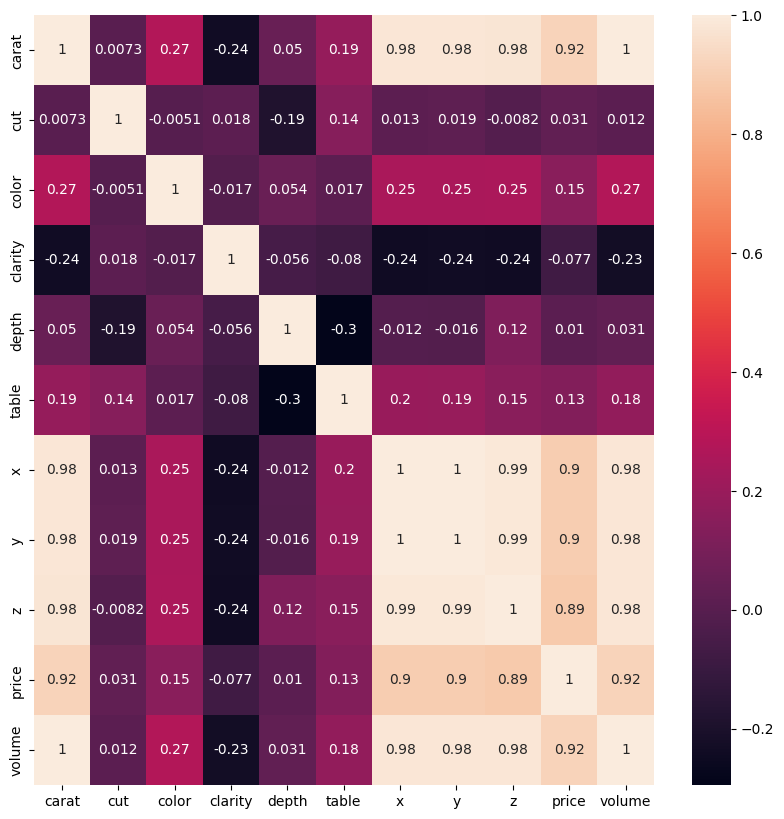

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)


In [73]:
scaled_df = df.copy()

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 42)

In [75]:
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [79]:
accuracy = []

In [82]:
models = {
    'lr' : LinearRegression(),
    'knn' : KNeighborsRegressor(),
    'dt' : DecisionTreeRegressor(),
    'rf' : RandomForestRegressor(),
    'svr' : SVR(),
    'xgb' : XGBRegressor(),
    #'cb' : CatBoostRegressor(),
    'gb' : GradientBoostingRegressor(),
    #'log' : LogisticRegression(),
    #'ada' : AdaBoostRegressor()
}

In [83]:
#train for each model
accuracy = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    print(list(models.keys())[i], acc, mse)
    accuracy.append({
        'model' : list(models.keys())[i],
        'accuracy' : r2_score(y_test,y_pred)*100
    })

print(accuracy)

lr 1.0 5.843422443725908e-25
knn 0.999999875730026 0.9535373317013467
dt 0.9999996838111006 2.4261525907792736
rf 0.9999999042113957 0.7349966136270937
svr 0.8432527624754868 1202738.9865136852
xgb 0.9999353589787832 495.9977449900697
gb 0.9999521115094477 367.453714031482
[{'model': 'lr', 'accuracy': 100.0}, {'model': 'knn', 'accuracy': 99.9999875730026}, {'model': 'dt', 'accuracy': 99.99996948709327}, {'model': 'rf', 'accuracy': 99.99999021506592}, {'model': 'svr', 'accuracy': 84.32527624754867}, {'model': 'xgb', 'accuracy': 99.99353589787832}, {'model': 'cb', 'accuracy': 99.99127863041083}, {'model': 'gb', 'accuracy': 99.99521115094477}, {'model': 'lr', 'accuracy': 100.0}, {'model': 'knn', 'accuracy': 99.9999875730026}, {'model': 'dt', 'accuracy': 99.99996838111007}, {'model': 'rf', 'accuracy': 99.99999042113957}, {'model': 'svr', 'accuracy': 84.32527624754867}, {'model': 'xgb', 'accuracy': 99.99353589787832}, {'model': 'gb', 'accuracy': 99.99521115094477}]


In [85]:
accuracy

[{'model': 'lr', 'accuracy': 100.0},
 {'model': 'knn', 'accuracy': 99.9999875730026},
 {'model': 'dt', 'accuracy': 99.99996948709327},
 {'model': 'rf', 'accuracy': 99.99999021506592},
 {'model': 'svr', 'accuracy': 84.32527624754867},
 {'model': 'xgb', 'accuracy': 99.99353589787832},
 {'model': 'cb', 'accuracy': 99.99127863041083},
 {'model': 'gb', 'accuracy': 99.99521115094477},
 {'model': 'lr', 'accuracy': 100.0},
 {'model': 'knn', 'accuracy': 99.9999875730026},
 {'model': 'dt', 'accuracy': 99.99996838111007},
 {'model': 'rf', 'accuracy': 99.99999042113957},
 {'model': 'svr', 'accuracy': 84.32527624754867},
 {'model': 'xgb', 'accuracy': 99.99353589787832},
 {'model': 'gb', 'accuracy': 99.99521115094477}]

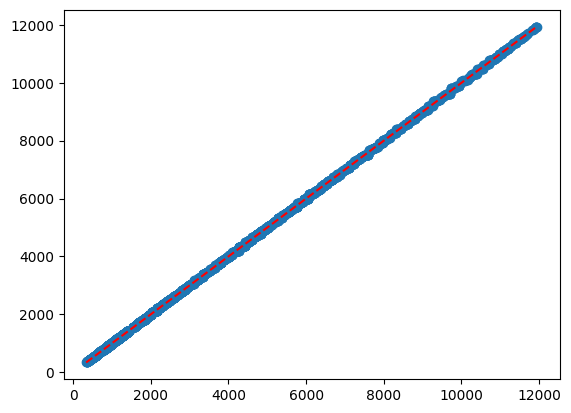

In [101]:
plt.scatter(y_test, y_pred)
#plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [105]:
# best performing model = Linear Regression

In [107]:
filtered_df.drop(columns='volume', axis=1, inplace=True)

In [108]:
filtered_df.to_csv('filtered_df.csv')